Importing the libraries and reading the data
# Importing libraries

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [5]:
 !pip install --upgrade scikit-learn

In [6]:
# pip install imbalanced-learn

In [7]:
!pip install --upgrade imbalanced-learn

In [8]:
# !pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [9]:
# Reading the data
credit_risk= pd.read_csv("/UCI_Credit_Card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
### Copy the original data in data frame called df.
df= credit_risk.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Data preparation and Pre-processing
#Pre-processing

In [11]:
# Let's see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [12]:
# Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data

In [13]:
# Lets check the statistics of data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
# checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

***Analysis of Columns***






#Education


EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [15]:
# Let's see the value counts in EDUCATION columns:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown"
# Changing 0,5 and 6 to keep it under 1 category.

df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

#Marriage

Marital status (1=married, 2=single, 3=others)

In [17]:
# let's see the values count in marriage column 
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
# Mapping of 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

#PAY_0 to PAY_6

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [19]:
# Let's see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

#Data Visualization

Text(0.5, 1.0, 'Target Distribution')

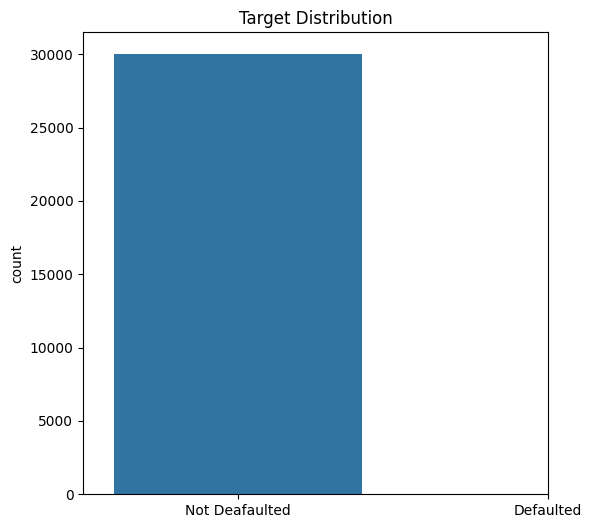

In [20]:
# Visualize the target column "default.payment.next.month"
plt.figure(figsize=(6,6))
sns.countplot(df['default.payment.next.month'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

In [21]:
# Let's count it
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

So, By looking at the target varibale we could say that, our data is pretty much imbalance. We would like to make it balanced before going to trained the model.

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

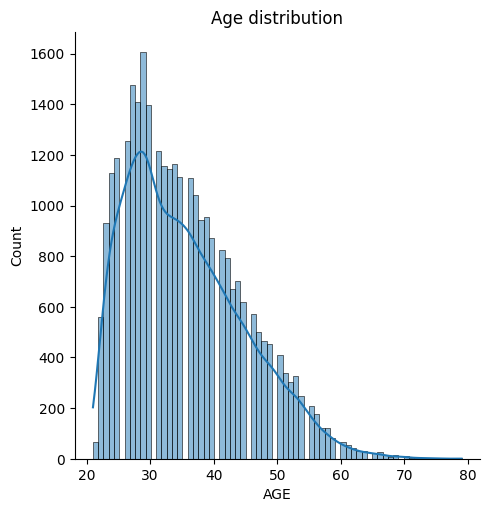

In [22]:
# with age column
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

Text(0.5, 1.0, 'Gender Distribution')

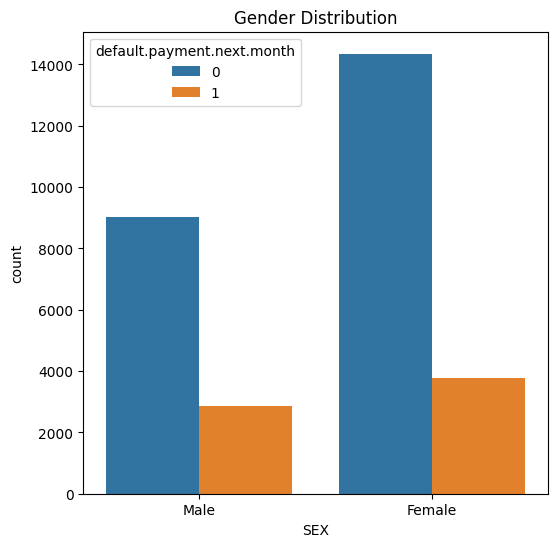

In [23]:
# With sex columns
# Gender (1=male, 2=female)
plt.figure(figsize=(6,6))
sns.countplot(x='SEX',hue='default.payment.next.month',data=df)
plt.xticks([0,1], labels=["Male", "Female"])

#plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Education Distribution')

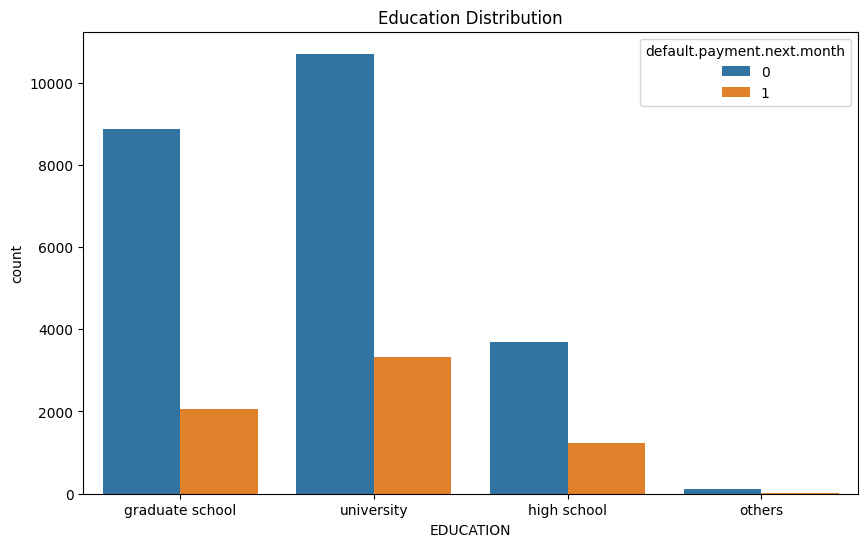

In [24]:
# With EDUCATION columns
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(10,6))
sns.countplot(x='EDUCATION', hue='default.payment.next.month',data=df)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

Text(0.5, 1.0, 'MARRIAGE Distribution')

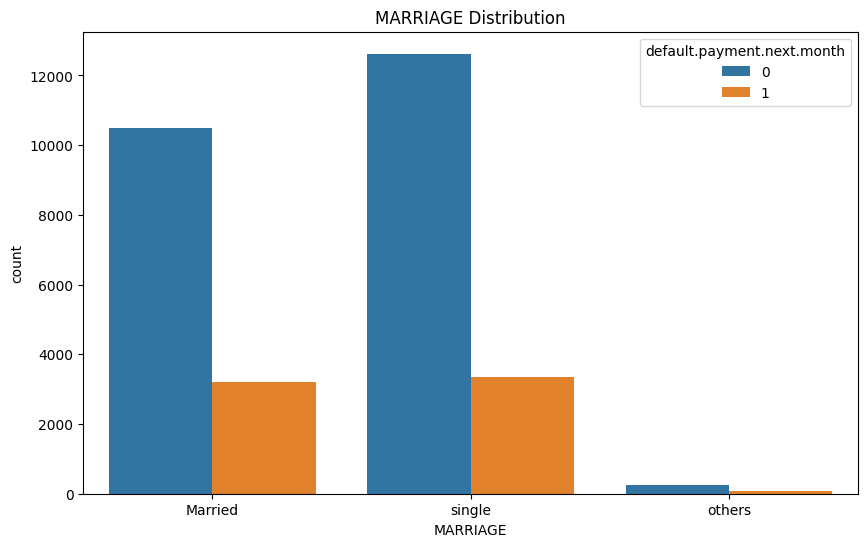

In [25]:
# With MARRIAGE columns

plt.figure(figsize=(10,6))
sns.countplot(x='MARRIAGE',hue='default.payment.next.month',data=df)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

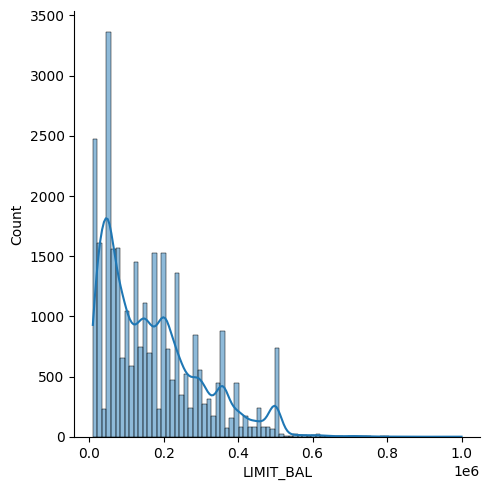

In [26]:
# With column 'limit_bal'
sns.displot(df.LIMIT_BAL, kde=True)

<ipython-input-27-0856bfd87f57>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


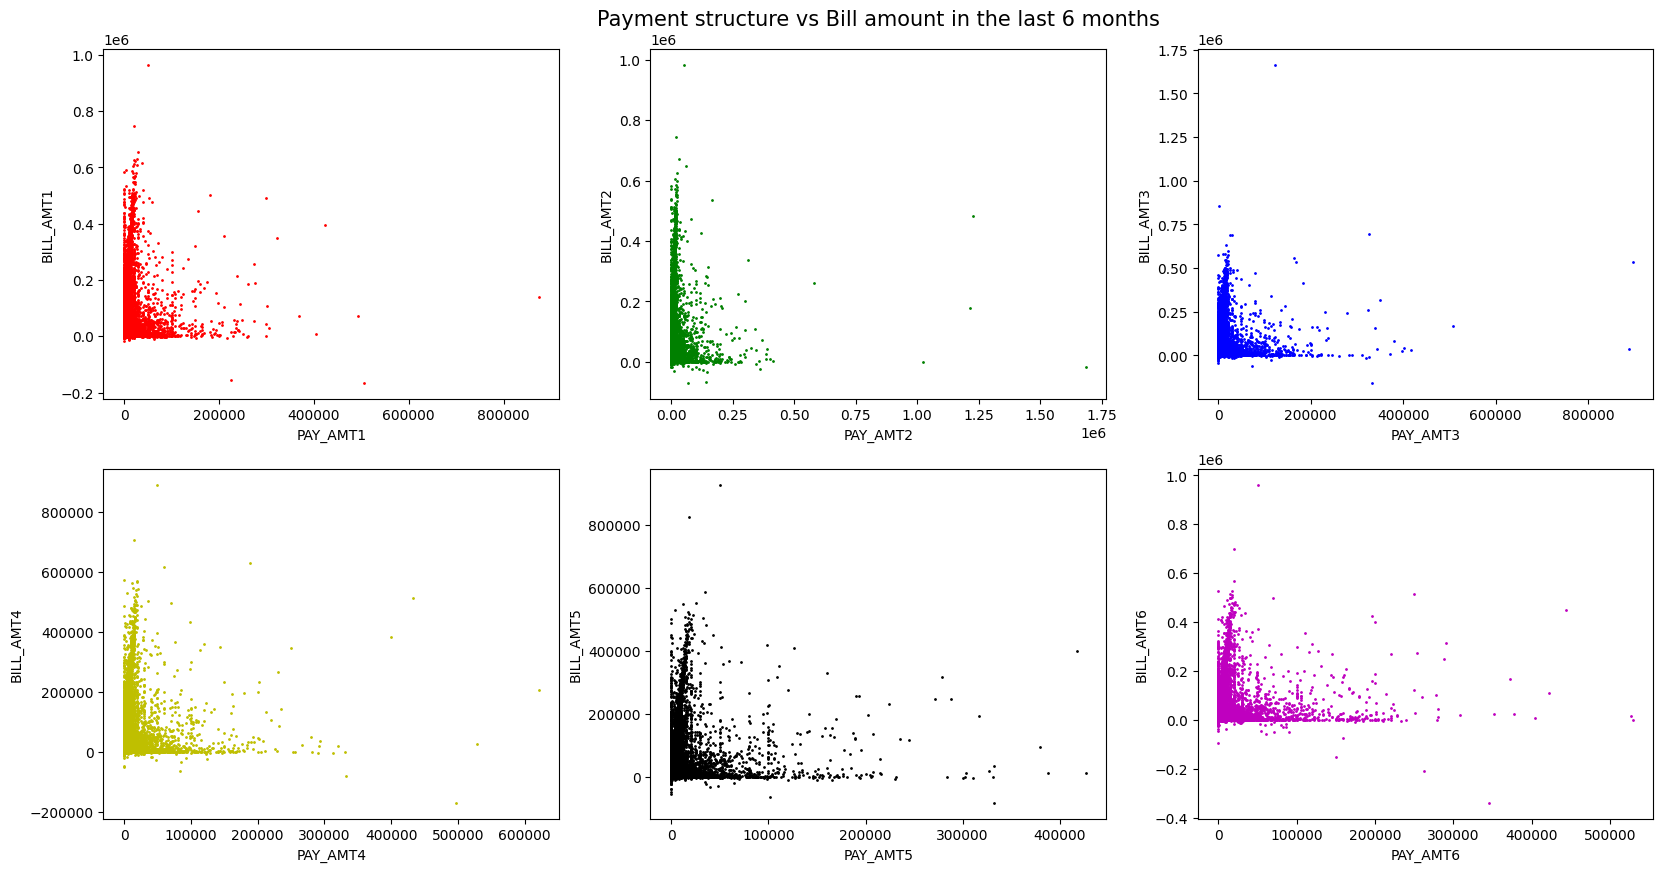

In [27]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

#Creating Independent features and depened features

In [28]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


#Scaling the features

*   Scaling the independent features are very important so that our model is not biased toward the higher range of values. To make all features in same range.
*   Here we are using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

**Balancing the data**


*   Since our dataset was imbalace, so SMOTE technique has been used to make it balanced.
*   For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement [2]. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.


In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
# print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
# print("After oversampling: ",Counter(y_train))

***Building Models***

#Logistic regression Model:

In [32]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predicting the model
pred_logit= logit.predict(X_test)

Evaluation metrics

In [34]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))


The accuracy of logit model is: 0.6831666666666667
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000



In [47]:
# Plot confusion metrics
cm = confusion_matrix(y_test, pred_logit)

<Axes: >

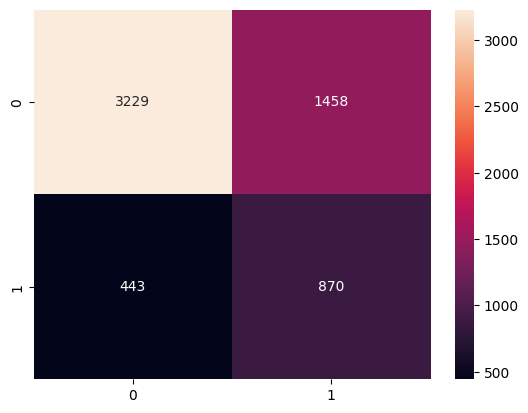

In [51]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

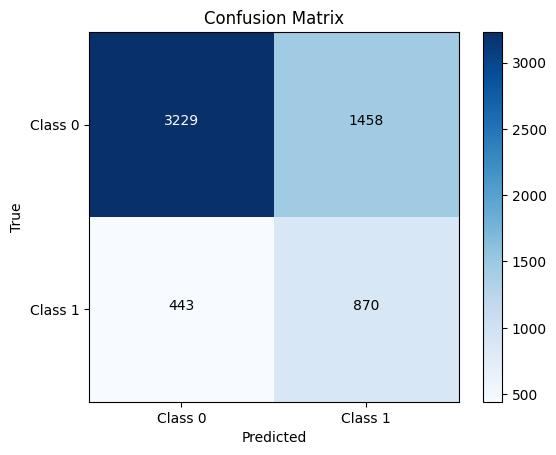

In [35]:
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_test, pred_logit)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Modify these labels accordingly
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

# Annotate the confusion matrix with counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [60]:
sklearn.metrics.precision_recall_curve(y_test, pred_logit)

(array([0.21883333, 0.37371134, 1.        ]),
 array([1.        , 0.66260472, 0.        ]),
 array([0, 1]))

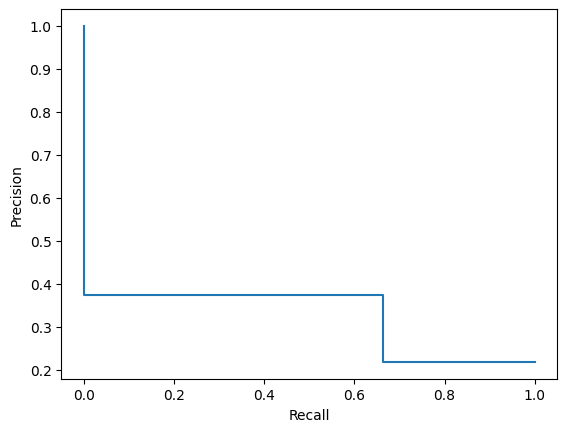

In [65]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred_logit)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

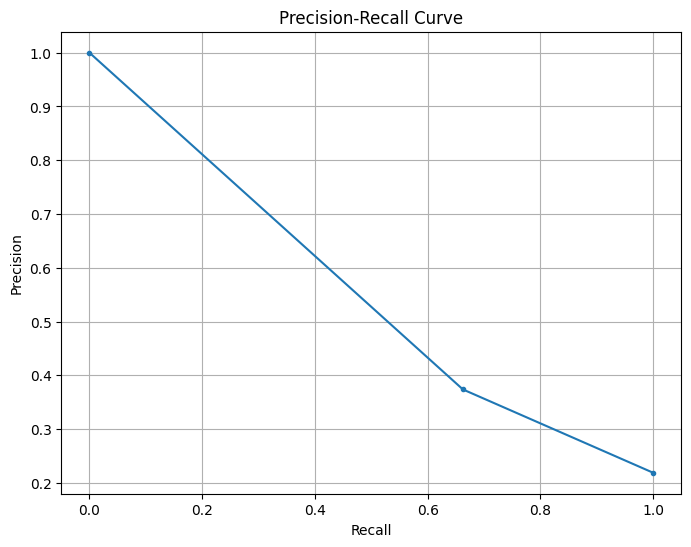

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have your predicted probabilities (y_scores) and true labels (y_test)
precision, recall, _ = precision_recall_curve(y_test, pred_logit)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

#Random Forest Classifer

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# Predicting the model
pred_rf= rf.predict(X_test)

Evaluating the model

In [39]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

The accuracy of logit model is: 0.7931666666666667
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.53      0.47      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.79      0.79      0.79      6000



In [67]:
# Plot confusion metric
cm = confusion_matrix(y_test, pred_rf)

<Axes: >

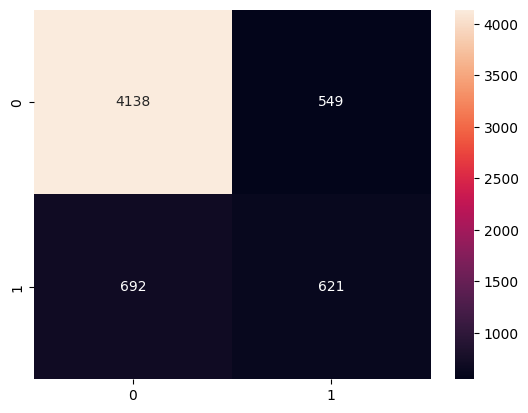

In [68]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

In [69]:
sklearn.metrics.precision_recall_curve(y_test, pred_rf)

(array([0.21883333, 0.53076923, 1.        ]),
 array([1.        , 0.47296268, 0.        ]),
 array([0, 1]))

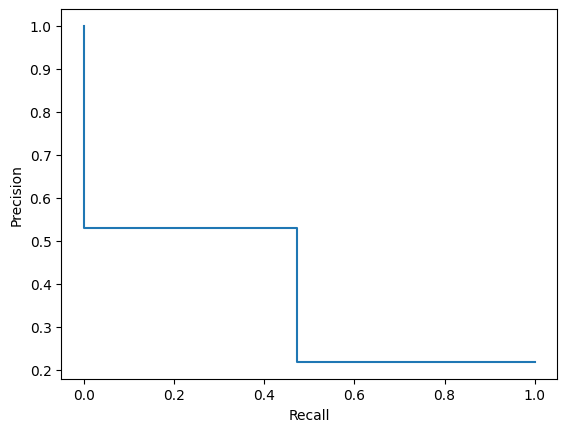

In [70]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred_rf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

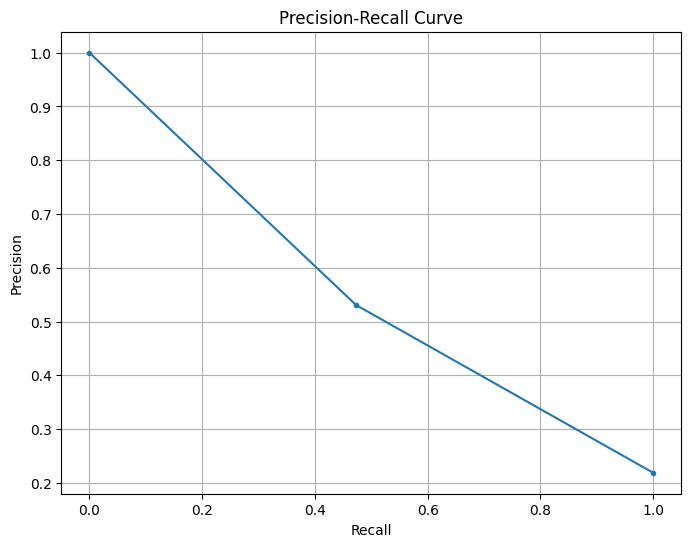

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have your predicted probabilities (y_scores) and true labels (y_test)
precision, recall, _ = precision_recall_curve(y_test, pred_rf)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

#XGBoost Classifier

In [72]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
## Predicting the model
pred_xgb= xgb_clf.predict(X_test)

Evaluating the model

In [77]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test,pred_xgb ))

The accuracy of logit model is: 0.8081666666666667
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.59      0.39      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [78]:
# Plot confusion metric
cm = confusion_matrix(y_test, pred_xgb)

<Axes: >

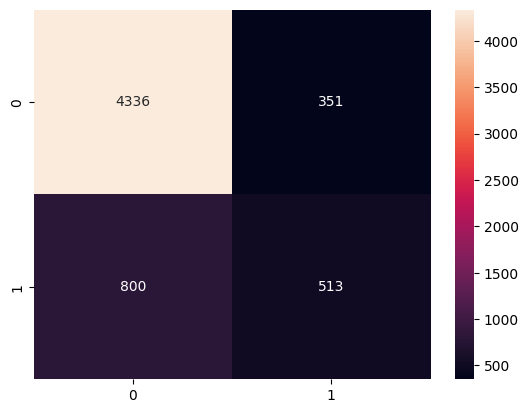

In [79]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

In [80]:
sklearn.metrics.precision_recall_curve(y_test, pred_xgb)

(array([0.21883333, 0.59375   , 1.        ]),
 array([1.       , 0.3907083, 0.       ]),
 array([0, 1]))

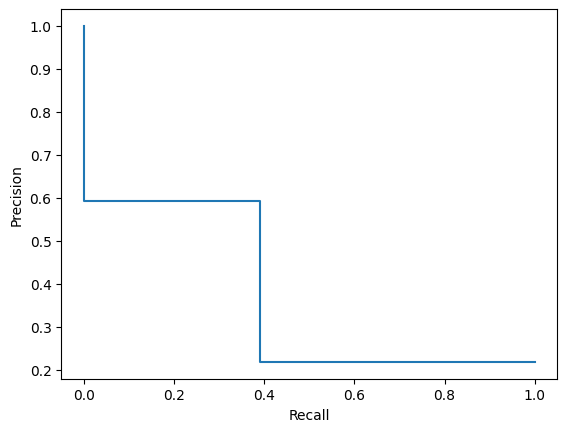

In [82]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred_xgb)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

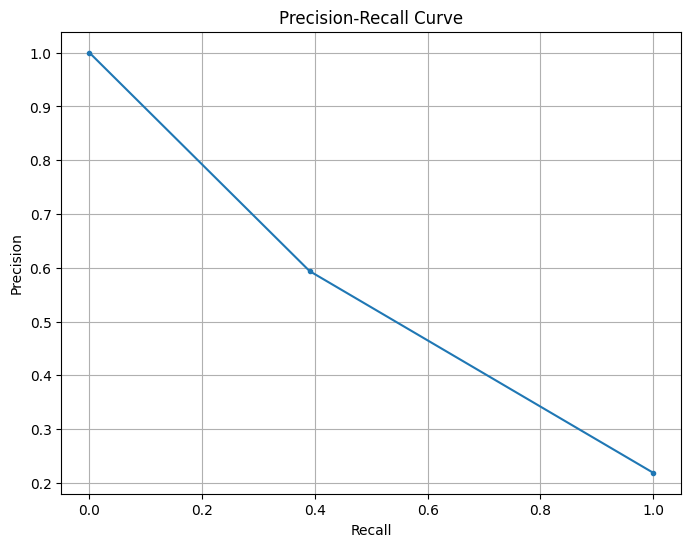

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have your predicted probabilities (y_scores) and true labels (y_test)
precision, recall, _ = precision_recall_curve(y_test, pred_xgb)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

#Hyperparameter tunning

In [84]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [85]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [87]:
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [88]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
# Finding the best param
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [97]:
!pip install xgboost

In [92]:
import xgboost as xgb


In [93]:
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.2,
                                  learning_rate=0.15,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  subsample=0.9,
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
# Predicting model
y_pred= classifier.predict(X_test)

Evaluating the model after hyperparameter tuning

In [95]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


The accuracy of the model is: 0.8061666666666667
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.41      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



#Cross validation

In [96]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

In [98]:
score

array([0.803     , 0.80666667, 0.81133333, 0.80566667, 0.81266667,
       0.82433333, 0.83333333, 0.82833333, 0.82233333, 0.817     ])

In [99]:
score.mean()

0.8164666666666667

In [ ]:
Arnav Anand | Github: debug38